In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_500_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_500_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_500_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_500_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [11]:
len(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192])

2217038

In [5]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades22_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341
Cascade length:  11000
New Orders left:  2845341
making new cascade


OG Orders left:  2845341
Cascade length:  12337
New Orders left:  2833004
making new cascade


OG Orders left:  2833004
Cascade length:  9586
New Orders left:  2823418
making new cascade


OG Orders left:  2823418
Cascade length:  13601
New Orders left:  2809817
making new cascade


OG Orders left:  2809817
Cascade length:  13271
New Orders left:  2796546
making new cascade


OG Orders left:  2796546
Cascade length:  12712
New Orders left:  2783834
making new cascade


OG Orders left:  2783834
Cascade length:  9604
New Orders left:  2774230
making new cascade


OG Orders left:  2774230
Cascade length:  12151
New Orders left:  2762079
making new cascade


OG Orders left:  2762079
Cascade length:  10024
New Orders left:  2752055
making new cascade


OG Orders left:  2752055
Cascade length:  7281
New Orders left:  2744774
making new cascade


OG Orders left:  2744774
Cascade length:  9660
New Or

Cascade length:  4
New Orders left:  2377733
making new cascade


OG Orders left:  2377733
Cascade length:  3664
New Orders left:  2374069
making new cascade


OG Orders left:  2374069
Cascade length:  15
New Orders left:  2374054
making new cascade


OG Orders left:  2374054
Cascade length:  4161
New Orders left:  2369893
making new cascade


OG Orders left:  2369893
Cascade length:  51
New Orders left:  2369842
making new cascade


OG Orders left:  2369842
Cascade length:  3502
New Orders left:  2366340
making new cascade


OG Orders left:  2366340
Cascade length:  3180
New Orders left:  2363160
making new cascade


OG Orders left:  2363160
Cascade length:  2747
New Orders left:  2360413
making new cascade


OG Orders left:  2360413
Cascade length:  38
New Orders left:  2360375
making new cascade


OG Orders left:  2360375
Cascade length:  4315
New Orders left:  2356060
making new cascade


OG Orders left:  2356060
Cascade length:  3092
New Orders left:  2352968
making new cascade




Cascade length:  45
New Orders left:  2184449
making new cascade


OG Orders left:  2184449
Cascade length:  25
New Orders left:  2184424
making new cascade


OG Orders left:  2184424
Cascade length:  7
New Orders left:  2184417
making new cascade


OG Orders left:  2184417
Cascade length:  4117
New Orders left:  2180300
making new cascade


OG Orders left:  2180300
Cascade length:  16
New Orders left:  2180284
making new cascade


OG Orders left:  2180284
Cascade length:  14
New Orders left:  2180270
making new cascade


OG Orders left:  2180270
Cascade length:  53
New Orders left:  2180217
making new cascade


OG Orders left:  2180217
Cascade length:  2681
New Orders left:  2177536
making new cascade


OG Orders left:  2177536
Cascade length:  32
New Orders left:  2177504
making new cascade


OG Orders left:  2177504
Cascade length:  4445
New Orders left:  2173059
making new cascade


OG Orders left:  2173059
Cascade length:  4206
New Orders left:  2168853
making new cascade


OG Ord

Cascade length:  27
New Orders left:  2065578
making new cascade


OG Orders left:  2065578
Cascade length:  16
New Orders left:  2065562
making new cascade


OG Orders left:  2065562
Cascade length:  5554
New Orders left:  2060008
making new cascade


OG Orders left:  2060008
Cascade length:  7
New Orders left:  2060001
making new cascade


OG Orders left:  2060001
Cascade length:  46
New Orders left:  2059955
making new cascade


OG Orders left:  2059955
Cascade length:  4
New Orders left:  2059951
making new cascade


OG Orders left:  2059951
Cascade length:  49
New Orders left:  2059902
making new cascade


OG Orders left:  2059902
Cascade length:  2226
New Orders left:  2057676
making new cascade


OG Orders left:  2057676
Cascade length:  3092
New Orders left:  2054584
making new cascade


OG Orders left:  2054584
Cascade length:  3059
New Orders left:  2051525
making new cascade


OG Orders left:  2051525
Cascade length:  25
New Orders left:  2051500
making new cascade


OG Orde

Cascade length:  18
New Orders left:  1922152
making new cascade


OG Orders left:  1922152
Cascade length:  5159
New Orders left:  1916993
making new cascade


OG Orders left:  1916993
Cascade length:  2437
New Orders left:  1914556
making new cascade


OG Orders left:  1914556
Cascade length:  7
New Orders left:  1914549
making new cascade


OG Orders left:  1914549
Cascade length:  39
New Orders left:  1914510
making new cascade


OG Orders left:  1914510
Cascade length:  1
New Orders left:  1914509
making new cascade


OG Orders left:  1914509
Cascade length:  171
New Orders left:  1914338
making new cascade


OG Orders left:  1914338
Cascade length:  4788
New Orders left:  1909550
making new cascade


OG Orders left:  1909550
Cascade length:  4564
New Orders left:  1904986
making new cascade


OG Orders left:  1904986
Cascade length:  1898
New Orders left:  1903088
making new cascade


OG Orders left:  1903088
Cascade length:  2
New Orders left:  1903086
making new cascade


OG Or

Cascade length:  4
New Orders left:  1791144
making new cascade


OG Orders left:  1791144
Cascade length:  2493
New Orders left:  1788651
making new cascade


OG Orders left:  1788651
Cascade length:  3240
New Orders left:  1785411
making new cascade


OG Orders left:  1785411
Cascade length:  5183
New Orders left:  1780228
making new cascade


OG Orders left:  1780228
Cascade length:  2
New Orders left:  1780226
making new cascade


OG Orders left:  1780226
Cascade length:  4918
New Orders left:  1775308
making new cascade


OG Orders left:  1775308
Cascade length:  2
New Orders left:  1775306
making new cascade


OG Orders left:  1775306
Cascade length:  4
New Orders left:  1775302
making new cascade


OG Orders left:  1775302
Cascade length:  67
New Orders left:  1775235
making new cascade


OG Orders left:  1775235
Cascade length:  5071
New Orders left:  1770164
making new cascade


OG Orders left:  1770164
Cascade length:  4
New Orders left:  1770160
making new cascade


OG Order

Cascade length:  2751
New Orders left:  1634943
making new cascade


OG Orders left:  1634943
Cascade length:  244
New Orders left:  1634699
making new cascade


OG Orders left:  1634699
Cascade length:  4114
New Orders left:  1630585
making new cascade


OG Orders left:  1630585
Cascade length:  3597
New Orders left:  1626988
making new cascade


OG Orders left:  1626988
Cascade length:  3
New Orders left:  1626985
making new cascade


OG Orders left:  1626985
Cascade length:  2
New Orders left:  1626983
making new cascade


OG Orders left:  1626983
Cascade length:  2598
New Orders left:  1624385
making new cascade


OG Orders left:  1624385
Cascade length:  3137
New Orders left:  1621248
making new cascade


OG Orders left:  1621248
Cascade length:  133
New Orders left:  1621115
making new cascade


OG Orders left:  1621115
Cascade length:  3
New Orders left:  1621112
making new cascade


OG Orders left:  1621112
Cascade length:  3494
New Orders left:  1617618
making new cascade


OG

Cascade length:  8
New Orders left:  1476816
making new cascade


OG Orders left:  1476816
Cascade length:  4262
New Orders left:  1472554
making new cascade


OG Orders left:  1472554
Cascade length:  59
New Orders left:  1472495
making new cascade


OG Orders left:  1472495
Cascade length:  2752
New Orders left:  1469743
making new cascade


OG Orders left:  1469743
Cascade length:  5
New Orders left:  1469738
making new cascade


OG Orders left:  1469738
Cascade length:  3975
New Orders left:  1465763
making new cascade


OG Orders left:  1465763
Cascade length:  3040
New Orders left:  1462723
making new cascade


OG Orders left:  1462723
Cascade length:  3355
New Orders left:  1459368
making new cascade


OG Orders left:  1459368
Cascade length:  3204
New Orders left:  1456164
making new cascade


OG Orders left:  1456164
Cascade length:  3657
New Orders left:  1452507
making new cascade


OG Orders left:  1452507
Cascade length:  12
New Orders left:  1452495
making new cascade


O

Cascade length:  8
New Orders left:  1345340
making new cascade


OG Orders left:  1345340
Cascade length:  27
New Orders left:  1345313
making new cascade


OG Orders left:  1345313
Cascade length:  8
New Orders left:  1345305
making new cascade


OG Orders left:  1345305
Cascade length:  9
New Orders left:  1345296
making new cascade


OG Orders left:  1345296
Cascade length:  26
New Orders left:  1345270
making new cascade


OG Orders left:  1345270
Cascade length:  3903
New Orders left:  1341367
making new cascade


OG Orders left:  1341367
Cascade length:  4098
New Orders left:  1337269
making new cascade


OG Orders left:  1337269
Cascade length:  3
New Orders left:  1337266
making new cascade


OG Orders left:  1337266
Cascade length:  2281
New Orders left:  1334985
making new cascade


OG Orders left:  1334985
Cascade length:  2
New Orders left:  1334983
making new cascade


OG Orders left:  1334983
Cascade length:  18
New Orders left:  1334965
making new cascade


OG Orders le

Cascade length:  64
New Orders left:  1231452
making new cascade


OG Orders left:  1231452
Cascade length:  1
New Orders left:  1231451
making new cascade


OG Orders left:  1231451
Cascade length:  3558
New Orders left:  1227893
making new cascade


OG Orders left:  1227893
Cascade length:  2003
New Orders left:  1225890
making new cascade


OG Orders left:  1225890
Cascade length:  53
New Orders left:  1225837
making new cascade


OG Orders left:  1225837
Cascade length:  2842
New Orders left:  1222995
making new cascade


OG Orders left:  1222995
Cascade length:  1337
New Orders left:  1221658
making new cascade


OG Orders left:  1221658
Cascade length:  3148
New Orders left:  1218510
making new cascade


OG Orders left:  1218510
Cascade length:  224
New Orders left:  1218286
making new cascade


OG Orders left:  1218286
Cascade length:  2975
New Orders left:  1215311
making new cascade


OG Orders left:  1215311
Cascade length:  14
New Orders left:  1215297
making new cascade


O

Cascade length:  504
New Orders left:  1096072
making new cascade


OG Orders left:  1096072
Cascade length:  3658
New Orders left:  1092414
making new cascade


OG Orders left:  1092414
Cascade length:  2631
New Orders left:  1089783
making new cascade


OG Orders left:  1089783
Cascade length:  2514
New Orders left:  1087269
making new cascade


OG Orders left:  1087269
Cascade length:  2189
New Orders left:  1085080
making new cascade


OG Orders left:  1085080
Cascade length:  28
New Orders left:  1085052
making new cascade


OG Orders left:  1085052
Cascade length:  3248
New Orders left:  1081804
making new cascade


OG Orders left:  1081804
Cascade length:  11
New Orders left:  1081793
making new cascade


OG Orders left:  1081793
Cascade length:  3544
New Orders left:  1078249
making new cascade


OG Orders left:  1078249
Cascade length:  4067
New Orders left:  1074182
making new cascade


OG Orders left:  1074182
Cascade length:  2238
New Orders left:  1071944
making new cascad

Cascade length:  3118
New Orders left:  974854
making new cascade


OG Orders left:  974854
Cascade length:  3
New Orders left:  974851
making new cascade


OG Orders left:  974851
Cascade length:  2607
New Orders left:  972244
making new cascade


OG Orders left:  972244
Cascade length:  23
New Orders left:  972221
making new cascade


OG Orders left:  972221
Cascade length:  2517
New Orders left:  969704
making new cascade


OG Orders left:  969704
Cascade length:  7
New Orders left:  969697
making new cascade


OG Orders left:  969697
Cascade length:  3249
New Orders left:  966448
making new cascade


OG Orders left:  966448
Cascade length:  824
New Orders left:  965624
making new cascade


OG Orders left:  965624
Cascade length:  72
New Orders left:  965552
making new cascade


OG Orders left:  965552
Cascade length:  3
New Orders left:  965549
making new cascade


OG Orders left:  965549
Cascade length:  2116
New Orders left:  963433
making new cascade


OG Orders left:  963433
Ca

Cascade length:  4114
New Orders left:  866784
making new cascade


OG Orders left:  866784
Cascade length:  20
New Orders left:  866764
making new cascade


OG Orders left:  866764
Cascade length:  17
New Orders left:  866747
making new cascade


OG Orders left:  866747
Cascade length:  179
New Orders left:  866568
making new cascade


OG Orders left:  866568
Cascade length:  1453
New Orders left:  865115
making new cascade


OG Orders left:  865115
Cascade length:  72
New Orders left:  865043
making new cascade


OG Orders left:  865043
Cascade length:  15
New Orders left:  865028
making new cascade


OG Orders left:  865028
Cascade length:  25
New Orders left:  865003
making new cascade


OG Orders left:  865003
Cascade length:  2173
New Orders left:  862830
making new cascade


OG Orders left:  862830
Cascade length:  2098
New Orders left:  860732
making new cascade


OG Orders left:  860732
Cascade length:  19
New Orders left:  860713
making new cascade


OG Orders left:  860713
C

Cascade length:  10
New Orders left:  757508
making new cascade


OG Orders left:  757508
Cascade length:  4
New Orders left:  757504
making new cascade


OG Orders left:  757504
Cascade length:  4644
New Orders left:  752860
making new cascade


OG Orders left:  752860
Cascade length:  5979
New Orders left:  746881
making new cascade


OG Orders left:  746881
Cascade length:  2259
New Orders left:  744622
making new cascade


OG Orders left:  744622
Cascade length:  5
New Orders left:  744617
making new cascade


OG Orders left:  744617
Cascade length:  3682
New Orders left:  740935
making new cascade


OG Orders left:  740935
Cascade length:  4
New Orders left:  740931
making new cascade


OG Orders left:  740931
Cascade length:  6
New Orders left:  740925
making new cascade


OG Orders left:  740925
Cascade length:  4906
New Orders left:  736019
making new cascade


OG Orders left:  736019
Cascade length:  16
New Orders left:  736003
making new cascade


OG Orders left:  736003
Casc

Cascade length:  82
New Orders left:  637499
making new cascade


OG Orders left:  637499
Cascade length:  1
New Orders left:  637498
making new cascade


OG Orders left:  637498
Cascade length:  13
New Orders left:  637485
making new cascade


OG Orders left:  637485
Cascade length:  262
New Orders left:  637223
making new cascade


OG Orders left:  637223
Cascade length:  5
New Orders left:  637218
making new cascade


OG Orders left:  637218
Cascade length:  3312
New Orders left:  633906
making new cascade


OG Orders left:  633906
Cascade length:  1865
New Orders left:  632041
making new cascade


OG Orders left:  632041
Cascade length:  2
New Orders left:  632039
making new cascade


OG Orders left:  632039
Cascade length:  6
New Orders left:  632033
making new cascade


OG Orders left:  632033
Cascade length:  37
New Orders left:  631996
making new cascade


OG Orders left:  631996
Cascade length:  1777
New Orders left:  630219
making new cascade


OG Orders left:  630219
Cascade

Cascade length:  3197
New Orders left:  570007
making new cascade


OG Orders left:  570007
Cascade length:  2452
New Orders left:  567555
making new cascade


OG Orders left:  567555
Cascade length:  49
New Orders left:  567506
making new cascade


OG Orders left:  567506
Cascade length:  70
New Orders left:  567436
making new cascade


OG Orders left:  567436
Cascade length:  32
New Orders left:  567404
making new cascade


OG Orders left:  567404
Cascade length:  5
New Orders left:  567399
making new cascade


OG Orders left:  567399
Cascade length:  50
New Orders left:  567349
making new cascade


OG Orders left:  567349
Cascade length:  800
New Orders left:  566549
making new cascade


OG Orders left:  566549
Cascade length:  3736
New Orders left:  562813
making new cascade


OG Orders left:  562813
Cascade length:  22
New Orders left:  562791
making new cascade


OG Orders left:  562791
Cascade length:  3235
New Orders left:  559556
making new cascade


OG Orders left:  559556
Ca

Cascade length:  6
New Orders left:  470049
making new cascade


OG Orders left:  470049
Cascade length:  23
New Orders left:  470026
making new cascade


OG Orders left:  470026
Cascade length:  5
New Orders left:  470021
making new cascade


OG Orders left:  470021
Cascade length:  2383
New Orders left:  467638
making new cascade


OG Orders left:  467638
Cascade length:  444
New Orders left:  467194
making new cascade


OG Orders left:  467194
Cascade length:  26
New Orders left:  467168
making new cascade


OG Orders left:  467168
Cascade length:  1554
New Orders left:  465614
making new cascade


OG Orders left:  465614
Cascade length:  3
New Orders left:  465611
making new cascade


OG Orders left:  465611
Cascade length:  95
New Orders left:  465516
making new cascade


OG Orders left:  465516
Cascade length:  13
New Orders left:  465503
making new cascade


OG Orders left:  465503
Cascade length:  86
New Orders left:  465417
making new cascade


OG Orders left:  465417
Cascade 

Cascade length:  103
New Orders left:  378644
making new cascade


OG Orders left:  378644
Cascade length:  2175
New Orders left:  376469
making new cascade


OG Orders left:  376469
Cascade length:  1
New Orders left:  376468
making new cascade


OG Orders left:  376468
Cascade length:  1469
New Orders left:  374999
making new cascade


OG Orders left:  374999
Cascade length:  2452
New Orders left:  372547
making new cascade


OG Orders left:  372547
Cascade length:  2
New Orders left:  372545
making new cascade


OG Orders left:  372545
Cascade length:  50
New Orders left:  372495
making new cascade


OG Orders left:  372495
Cascade length:  1519
New Orders left:  370976
making new cascade


OG Orders left:  370976
Cascade length:  2025
New Orders left:  368951
making new cascade


OG Orders left:  368951
Cascade length:  70
New Orders left:  368881
making new cascade


OG Orders left:  368881
Cascade length:  818
New Orders left:  368063
making new cascade


OG Orders left:  368063


Cascade length:  1433
New Orders left:  302267
making new cascade


OG Orders left:  302267
Cascade length:  15
New Orders left:  302252
making new cascade


OG Orders left:  302252
Cascade length:  145
New Orders left:  302107
making new cascade


OG Orders left:  302107
Cascade length:  1542
New Orders left:  300565
making new cascade


OG Orders left:  300565
Cascade length:  623
New Orders left:  299942
making new cascade


OG Orders left:  299942
Cascade length:  2580
New Orders left:  297362
making new cascade


OG Orders left:  297362
Cascade length:  798
New Orders left:  296564
making new cascade


OG Orders left:  296564
Cascade length:  301
New Orders left:  296263
making new cascade


OG Orders left:  296263
Cascade length:  1345
New Orders left:  294918
making new cascade


OG Orders left:  294918
Cascade length:  2
New Orders left:  294916
making new cascade


OG Orders left:  294916
Cascade length:  2573
New Orders left:  292343
making new cascade


OG Orders left:  2923

Cascade length:  1331
New Orders left:  230333
making new cascade


OG Orders left:  230333
Cascade length:  770
New Orders left:  229563
making new cascade


OG Orders left:  229563
Cascade length:  51
New Orders left:  229512
making new cascade


OG Orders left:  229512
Cascade length:  1455
New Orders left:  228057
making new cascade


OG Orders left:  228057
Cascade length:  2073
New Orders left:  225984
making new cascade


OG Orders left:  225984
Cascade length:  2401
New Orders left:  223583
making new cascade


OG Orders left:  223583
Cascade length:  2
New Orders left:  223581
making new cascade


OG Orders left:  223581
Cascade length:  1531
New Orders left:  222050
making new cascade


OG Orders left:  222050
Cascade length:  2347
New Orders left:  219703
making new cascade


OG Orders left:  219703
Cascade length:  32
New Orders left:  219671
making new cascade


OG Orders left:  219671
Cascade length:  1548
New Orders left:  218123
making new cascade


OG Orders left:  218

Cascade length:  1228
New Orders left:  134888
making new cascade


OG Orders left:  134888
Cascade length:  1581
New Orders left:  133307
making new cascade


OG Orders left:  133307
Cascade length:  212
New Orders left:  133095
making new cascade


OG Orders left:  133095
Cascade length:  39
New Orders left:  133056
making new cascade


OG Orders left:  133056
Cascade length:  223
New Orders left:  132833
making new cascade


OG Orders left:  132833
Cascade length:  684
New Orders left:  132149
making new cascade


OG Orders left:  132149
Cascade length:  1580
New Orders left:  130569
making new cascade


OG Orders left:  130569
Cascade length:  1282
New Orders left:  129287
making new cascade


OG Orders left:  129287
Cascade length:  2
New Orders left:  129285
making new cascade


OG Orders left:  129285
Cascade length:  1732
New Orders left:  127553
making new cascade


OG Orders left:  127553
Cascade length:  115
New Orders left:  127438
making new cascade


OG Orders left:  1274

Cascade length:  3
New Orders left:  85101
making new cascade


OG Orders left:  85101
Cascade length:  706
New Orders left:  84395
making new cascade


OG Orders left:  84395
Cascade length:  487
New Orders left:  83908
making new cascade


OG Orders left:  83908
Cascade length:  61
New Orders left:  83847
making new cascade


OG Orders left:  83847
Cascade length:  1314
New Orders left:  82533
making new cascade


OG Orders left:  82533
Cascade length:  1
New Orders left:  82532
making new cascade


OG Orders left:  82532
Cascade length:  28
New Orders left:  82504
making new cascade


OG Orders left:  82504
Cascade length:  4
New Orders left:  82500
making new cascade


OG Orders left:  82500
Cascade length:  4
New Orders left:  82496
making new cascade


OG Orders left:  82496
Cascade length:  2288
New Orders left:  80208
making new cascade


OG Orders left:  80208
Cascade length:  126
New Orders left:  80082
making new cascade


OG Orders left:  80082
Cascade length:  33
New Order

Cascade length:  20
New Orders left:  42693
making new cascade


OG Orders left:  42693
Cascade length:  1185
New Orders left:  41508
making new cascade


OG Orders left:  41508
Cascade length:  8
New Orders left:  41500
making new cascade


OG Orders left:  41500
Cascade length:  261
New Orders left:  41239
making new cascade


OG Orders left:  41239
Cascade length:  561
New Orders left:  40678
making new cascade


OG Orders left:  40678
Cascade length:  19
New Orders left:  40659
making new cascade


OG Orders left:  40659
Cascade length:  2
New Orders left:  40657
making new cascade


OG Orders left:  40657
Cascade length:  856
New Orders left:  39801
making new cascade


OG Orders left:  39801
Cascade length:  406
New Orders left:  39395
making new cascade


OG Orders left:  39395
Cascade length:  1531
New Orders left:  37864
making new cascade


OG Orders left:  37864
Cascade length:  32
New Orders left:  37832
making new cascade


OG Orders left:  37832
Cascade length:  125
New O

Cascade length:  569
New Orders left:  20679
making new cascade


OG Orders left:  20679
Cascade length:  647
New Orders left:  20032
making new cascade


OG Orders left:  20032
Cascade length:  11
New Orders left:  20021
making new cascade


OG Orders left:  20021
Cascade length:  443
New Orders left:  19578
making new cascade


OG Orders left:  19578
Cascade length:  347
New Orders left:  19231
making new cascade


OG Orders left:  19231
Cascade length:  1
New Orders left:  19230
making new cascade


OG Orders left:  19230
Cascade length:  8
New Orders left:  19222
making new cascade


OG Orders left:  19222
Cascade length:  20
New Orders left:  19202
making new cascade


OG Orders left:  19202
Cascade length:  148
New Orders left:  19054
making new cascade


OG Orders left:  19054
Cascade length:  74
New Orders left:  18980
making new cascade


OG Orders left:  18980
Cascade length:  1
New Orders left:  18979
making new cascade


OG Orders left:  18979
Cascade length:  433
New Order

Cascade length:  84
New Orders left:  4530
making new cascade


OG Orders left:  4530
Cascade length:  1
New Orders left:  4529
making new cascade


OG Orders left:  4529
Cascade length:  223
New Orders left:  4306
making new cascade


OG Orders left:  4306
Cascade length:  125
New Orders left:  4181
making new cascade


OG Orders left:  4181
Cascade length:  170
New Orders left:  4011
making new cascade


OG Orders left:  4011
Cascade length:  205
New Orders left:  3806
making new cascade


OG Orders left:  3806
Cascade length:  2
New Orders left:  3804
making new cascade


OG Orders left:  3804
Cascade length:  5
New Orders left:  3799
making new cascade


OG Orders left:  3799
Cascade length:  51
New Orders left:  3748
making new cascade


OG Orders left:  3748
Cascade length:  174
New Orders left:  3574
making new cascade


OG Orders left:  3574
Cascade length:  1
New Orders left:  3573
making new cascade


OG Orders left:  3573
Cascade length:  166
New Orders left:  3407
making ne

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades21_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades12_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades11_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

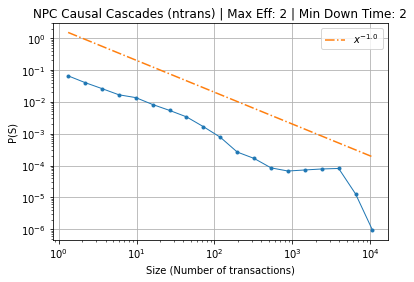

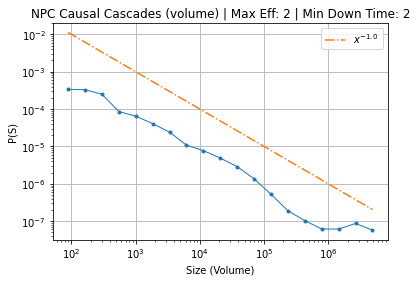

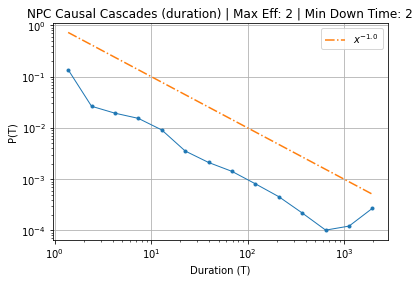

In [8]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

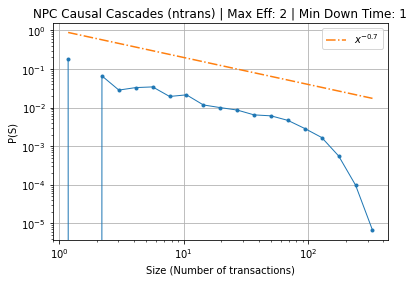

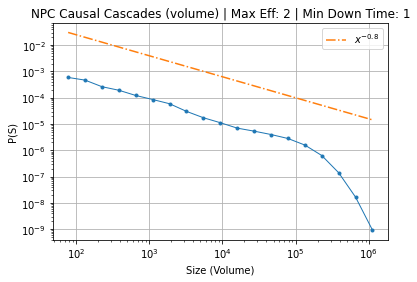

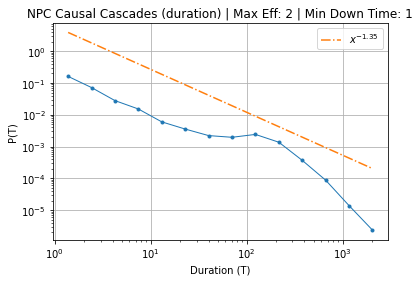

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

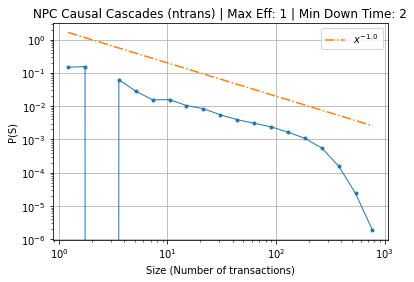

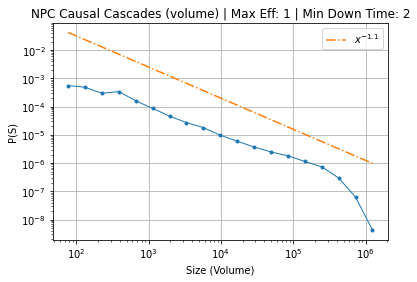

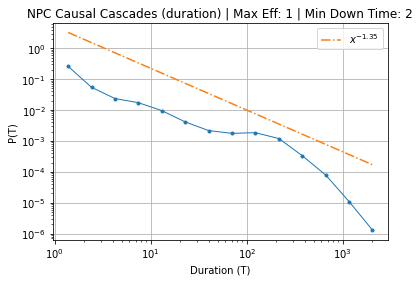

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

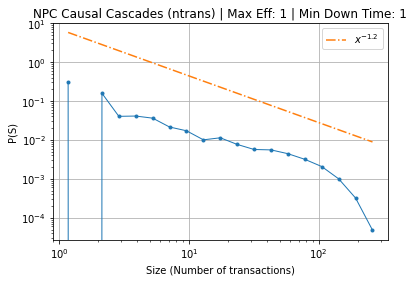

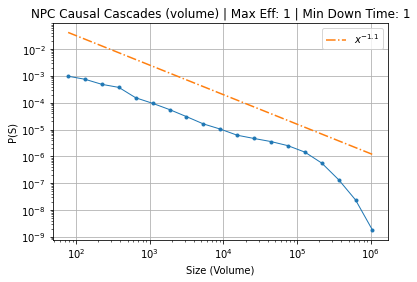

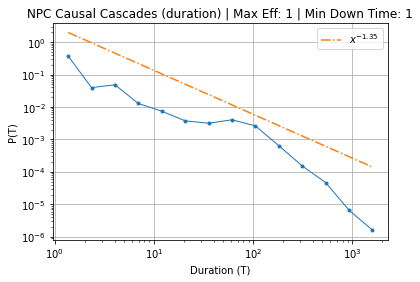

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
